Download the train.csv dataset and run some basic descriptive statistics and 
graphs for two or more variables of your choosing using Python.  Provide your 
Python code here, perhaps as a Jupyter notebook .html file on GitHub.  
Embed at least one graph in your discussion by using the "Files" link in the 
upper right portion of Canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib notebook

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#train.isnull().sum()
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [6]:
train_clean = train

# example of cleaning up the data

train_clean['Age'].fillna(train_clean['Age'].median(), inplace=True)
train_clean['Embarked'].fillna(train_clean['Embarked'].mode()[0], inplace = True)
train_clean['Fare'].fillna(train_clean['Fare'].median(), inplace = True)


In [7]:
train_clean.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# assess survivors
survived = train_clean[train_clean['Survived']==1]
no_survival = train_clean[train_clean['Survived']==0]
survived_col = "blue"
no_survival_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"%(len(survived), 1.*len(survived)/len(train_clean)*100.0,\
        len(no_survival), 1.*len(no_survival)/len(train_clean)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


Text(0.5,1,'Survived')

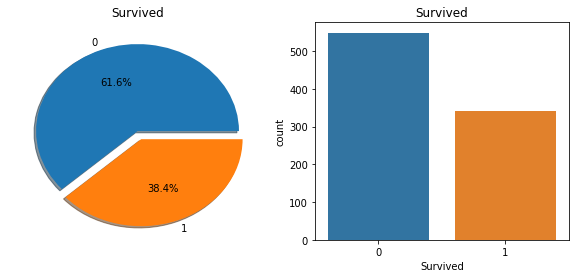

In [9]:
#plot number of survivors

f,ax=plt.subplots(1,2,figsize=(10,4))
train_clean['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_clean,ax=ax[1])
ax[1].set_title('Survived')
#plt.show()

In [10]:
# EDA example - assessing survivors by sex
pd.crosstab(train_clean.Sex,train_clean.Survived,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


C:\Users\brads\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Dead vs. Alive - Fare Distribution')

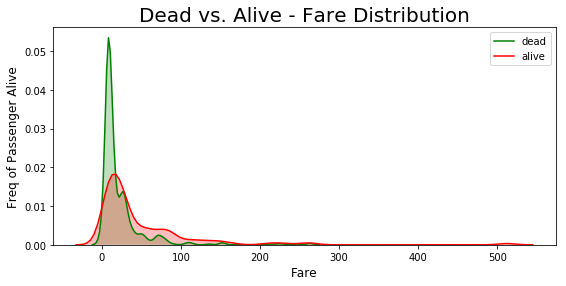

In [11]:
# KD plot fare dist alive vs dead
fig = plt.figure(figsize=(9,4),)
ax=sns.kdeplot(train_clean.loc[(train_clean['Survived'] == 0),'Fare'] , color='green',shade=True,label='dead')
ax=sns.kdeplot(train_clean.loc[(train_clean['Survived'] == 1),'Fare'] , color='red',shade=True, label='alive')
plt.ylabel("Freq of Passenger Alive", fontsize = 12)
plt.xlabel("Fare", fontsize = 12)
plt.title('Dead vs. Alive - Fare Distribution', fontsize = 20)


In [12]:
#look at feature correlation 
corr = train_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0342121,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0649104,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.339898,0.0830814,0.0184427,-0.5495
Age,0.0342121,-0.0649104,-0.339898,1,-0.233296,-0.172482,0.0966884
SibSp,-0.0575268,-0.0353225,0.0830814,-0.233296,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.172482,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0966884,0.159651,0.216225,1


In [13]:
#from week 1 discussion

import pandas_profiling
pandas_profiling.ProfileReport(train)

ModuleNotFoundError: No module named 'pandas_profiling'